# Example of lapsing temperature varibales for the hydrological units; Upper Bow river and forcing as ERA5 
## Visualize the average elevation of the hydrological units

/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


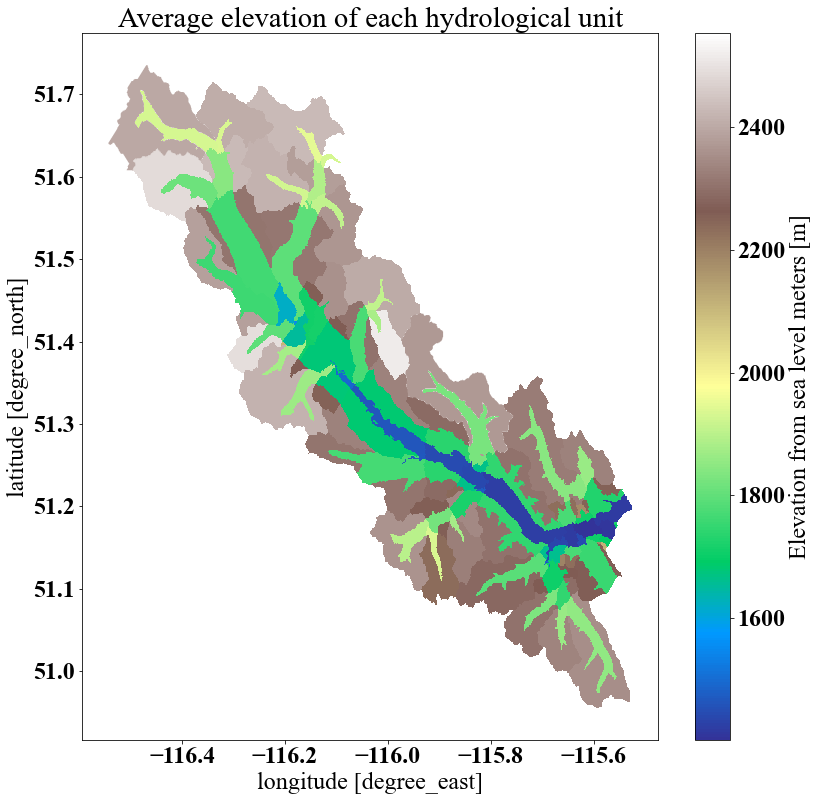

In [1]:
# first create the intersection of the two shapefile
# loading EASYMORE
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)

# load shapefile of the hydrological units including average elevation
shp_target = gpd.read_file('../data/target_shapefiles/Bow_merit_dem.shp')
# plot
fig, axes = plt.subplots(1,1,figsize=(13,13))
# with no normalization
shp_target.plot(column='elev_mean', cmap='terrain', legend=False, ax=axes)
norm = colors.Normalize(vmin=shp_target.elev_mean.min(), vmax=shp_target.elev_mean.max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='terrain')
# add colorbar
ax_cbar = fig.colorbar(cbar, ax=axes)
# add label for the colorbar
ax_cbar.set_label('Elevation from sea level meters [m]')
plt.xlabel('longitude [degree_east]')
plt.ylabel('latitude [degree_north]')
plt.title('Average elevation of each hydrological unit')
#plt.grid()
plt.savefig('../fig/Example6_A.png')

--------------
--------------
## Visualize the intersection of the hydrological units and ERA5 grid and their elevation difference

EASYMORE version 0.0.2 is initiated.


/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_74142/4056401110.py:17: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  shp_int.to_file('../data/target_shapefiles/Bow_merit_dem_ERA5_grid.shp')


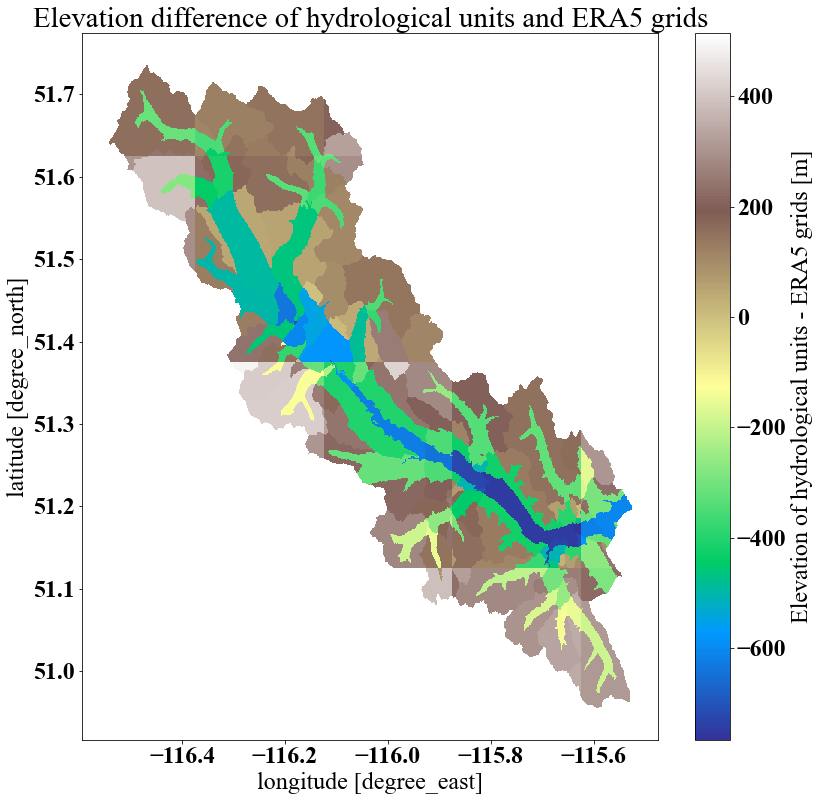

In [2]:
# first create the intersection of the two shapefile
# loading EASYMORE
from easymore.easymore import easymore
import geopandas as gpd
import matplotlib.pyplot as plt

# initializing EASYMORE object
esmr = easymore()

shp_source = gpd.read_file('../data/Source_shp_ERA5/era5_grid.shp') # comes in epsg:4326
shp_target = gpd.read_file('../data/target_shapefiles/Bow_merit_dem.shp') # comes in epsg:4326
shp_source = shp_source.to_crs('epsg:6933') # project to equal area before intersection
shp_target = shp_target.to_crs('epsg:6933')
shp_int = esmr.intersection_shp(shp_target, shp_source)
shp_int ['elev_diff'] = shp_int ['S_1_elev_mean'] - shp_int ['S_2_elev_m'] # elevation diff hydrological -ERA5
shp_int = shp_int.to_crs('epsg:4326') # back to regular lat/lon
shp_int.to_file('../data/target_shapefiles/Bow_merit_dem_ERA5_grid.shp')

# plot
fig, axes = plt.subplots(1,1,figsize=(13,13))
# with no normalization
shp_int.plot(column='elev_diff', cmap='terrain', legend=False, ax=axes)
norm = colors.Normalize(vmin=shp_int.elev_diff.min(), vmax=shp_int.elev_diff.max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='terrain')
# add colorbar
ax_cbar = fig.colorbar(cbar, ax=axes)
# add label for the colorbar
ax_cbar.set_label('Elevation of hydrological units - ERA5 grids [m]')
plt.xlabel('longitude [degree_east]')
plt.ylabel('latitude [degree_north]')
plt.title('Elevation difference of hydrological units and ERA5 grids')
#plt.grid()
plt.savefig('../fig/Example6_B.png')


---------------
---------------
## Remapping the temprature and precipitation to elements of hydrological units and ERA5 grids

In [3]:
# loading EASYMORE
from easymore.easymore import easymore

# initializing EASYMORE object
esmr = easymore()

# specifying EASYMORE objects
# name of the case; the temporary, remapping and remapped file names include case name
esmr.case_name                = 'Bow_lapse_temprature_detailed'              
# temporary path that the EASYMORE generated GIS files and remapped file will be saved
esmr.temp_dir                 = '../temporary/'
# name of target shapefile that the source netcdf files should be remapped to
esmr.target_shp               = '../data/target_shapefiles/Bow_merit_dem_ERA5_grid.shp'
# name of netCDF file(s); multiple files can be specified with *
esmr.source_nc                = '../data/Source_nc_ERA5/ERA5_NA_*.nc'
# name of shapefile for the source netCDF file(s)
esmr.source_shp               = '../data/Source_shp_ERA5/era5_grid.shp'
# name of latitude field for the source shapefile
esmr.source_shp_lat           = 'lat'
# name of longitude field for the source shapefile
esmr.source_shp_lon           = 'lon'
# name of variables from source netCDF file(s) to be remapped
esmr.var_names                = ['airtemp','pptrate']
# name of variable longitude in source netCDF files
esmr.var_lon                  = 'longitude'
# name of variable latitude in source netCDF files
esmr.var_lat                  = 'latitude'
# name of variable time in source netCDF file; should be always time
esmr.var_time                 = 'time'
# location where the remapped netCDF file will be saved
esmr.output_dir               = '../output/'
# format of the variables to be saved in remapped files,
# if one format provided it will be expanded to other variables
esmr.format_list              = ['f4']
# fill values of the variables to be saved in remapped files,
# if one value provided it will be expanded to other variables
esmr.fill_value_list          = ['-9999.00']
# if required that the remapped values to be saved as csv as well

# execute EASYMORE
esmr.nc_remapper()

EASYMORE version 0.0.2 is initiated.
no author name is provide and the author name is changed to (author name)!
EASYMORE is given multiple varibales to be remapped but only on format and fill valueEASYMORE repeat the format and fill value for all the variables in output files
EASYMORE will remap variable  airtemp  from source file to variable  airtemp  in remapped NeCDF file
EASYMORE will remap variable  pptrate  from source file to variable  pptrate  in remapped NeCDF file
EASYMORE detects that target shapefile is in WGS84 (epsg:4326)
EASYMORE detects that no field for ID is provided in sink/target shapefile
arbitarary values of ID are added in the field ID_t
EASYMORE detects that either of the fields for latitude or longitude is not provided in sink/target shapefile
calculating centroid of shapes in WGS84 projection;
for better appximation use the easymore equal area centroid function to preprocess target shapefile
EASYMORE detects that no field for latitude is provided in sink/targe

/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_vectorized.py:150: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  out[:] = [_pygeos_to_shapely(geom) for geom in data]
/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_vectorized.py:150: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  out[:] = [_pygeos_to_shapely(geom) for geom in data]


EASYMORE detects that the varibales from the netCDF files are identicalin dimensions of the varibales and latitude and longitude
EASYMORE detects that all the varibales have dimensions of:
['time', 'latitude', 'longitude']
EASYMORE detects that the longitude varibales has dimensions of:
['longitude']
EASYMORE detects that the latitude varibales has dimensions of:
['latitude']
EASYMORE detects case 1 - regular lat/lon
max difference of lat values in source nc files are :  0.0
max difference of lon values in source nc files are :  0.0
EASYMORE detect the shapefile is provided and will resave it here:
../temporary/Bow_lapse_temprature_detailed_source_shapefile.shp
EASYMORE detects that shapefile longitude is between -180 and 180, no correction is performed
EASYMORE detects that shapefile longitude is between -180 and 180, no correction is performed


/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_vectorized.py:150: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  out[:] = [_pygeos_to_shapely(geom) for geom in data]
/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_vectorized.py:150: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  out[:] = [_pygeos_to_shapely(geom) for geom in data]
/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site

------REMAPPING------
netcdf output file will be compressed at level 4
Remapping ../data/Source_nc_ERA5/ERA5_NA_19790101.nc to ../output/Bow_lapse_temprature_detailed_remapped_1979-01-01-00-00-00.nc
Started at date and time 2021-08-29 11:09:04.157714
Ended   at date and time 2021-08-29 11:09:04.536241
------
Remapping ../data/Source_nc_ERA5/ERA5_NA_19790102.nc to ../output/Bow_lapse_temprature_detailed_remapped_1979-01-02-00-00-00.nc
Started at date and time 2021-08-29 11:09:04.545111
Ended   at date and time 2021-08-29 11:09:04.951003
------
Remapping ../data/Source_nc_ERA5/ERA5_NA_19790103.nc to ../output/Bow_lapse_temprature_detailed_remapped_1979-01-03-00-00-00.nc
Started at date and time 2021-08-29 11:09:04.961775
Ended   at date and time 2021-08-29 11:09:05.449398
------


------------
------------
# Visualizing the temprature varibale for the elements of ERA5 grids and hydrological units

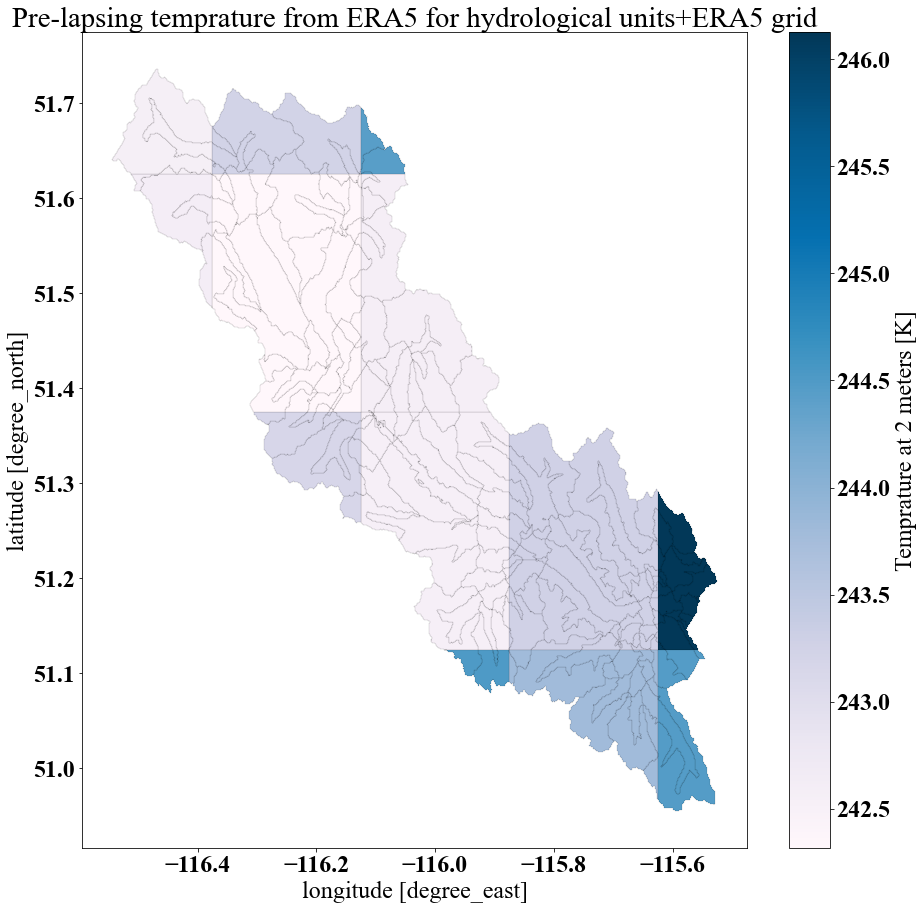

In [4]:
# visualize the result
import geopandas as gpd
import xarray as xr
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)

# visualize the remapped netCDF for the first file, first time step
# target nc file
nc_names = sorted(glob.glob (esmr.output_dir + esmr.case_name + '*.nc'))
ds       = xr.open_dataset(nc_names[0]) # the first netcdf file
values   = ds.airtemp [0,:] # the first time frame of the first 
IDs      = ds.ID [:] # get the ID
# create a data frame for the model simulation
df = pd.DataFrame()
df ['value'] = values
df ['ID_t']    = IDs  # .astype(int)
df = df.sort_values (by = 'ID_t')
# load the shape file target that is generated by EASYMORE (with consistent IDs)
shp_target = gpd.read_file(esmr.temp_dir+ esmr.case_name + '_target_shapefile.shp') # load the target shapefile
shp_target ['ID_t'] = shp_target ['ID_t'].astype(float)
shp_target = shp_target.sort_values(by='ID_t')# sort on values
shp_target = pd.merge_asof(shp_target, df, on='ID_t', direction='nearest')
shp_target = shp_target.set_geometry('geometry') #bring back the geometry filed; pd to gpd
# plotting
fig, axes = plt.subplots(1,1,figsize=(15,15))
shp_target.plot(column= 'value',cmap='PuBu', edgecolor='k',linewidth = 0.1, ax = axes )#, legend=True)
norm = colors.Normalize(vmin=shp_target.value.min(), vmax=shp_target.value.max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='PuBu')
# add colorbar
ax_cbar = fig.colorbar(cbar, ax=axes)
# add label for the colorbar
ax_cbar.set_label('Temprature at 2 meters [K]')
plt.xlabel('longitude [degree_east]')
plt.ylabel('latitude [degree_north]')
plt.title('Pre-lapsing temprature from ERA5 for hydrological units+ERA5 grid')
#plt.grid()
plt.savefig('../fig/Example6_C.png')


----------
----------
# Lapsing temperature based on elevation difference of the ERA5 and hydrological units based on 6.5 degrees decrease in temperature for each 1000 m increase in elevation 

In [5]:
# lapsing the temprature
shp_int = gpd.read_file('../data/target_shapefiles/Bow_merit_dem_ERA5_grid.shp')
elev_diff = np.array(shp_int.elev_diff)
nc_names = sorted(glob.glob (esmr.output_dir + esmr.case_name + '*.nc'))
for nc_name in nc_names:
    # get the time and number of elementes from the netcdf file
    ds       = xr.open_dataset(nc_name) # the first netcdf file
    time_dim_len = ds.dims['time']
    element_dim_len = ds.dims['ID']
    elev_diff_vstack = np.tile(elev_diff, (time_dim_len,1))
    ds.airtemp[:] = ds.airtemp[:] - elev_diff_vstack * 6.5 /1000
    ds.to_netcdf(nc_name+'lapsed')


--------------
--------------
# Visualzing the lapsed temperature for combination of ERA5 grids and hydrological units

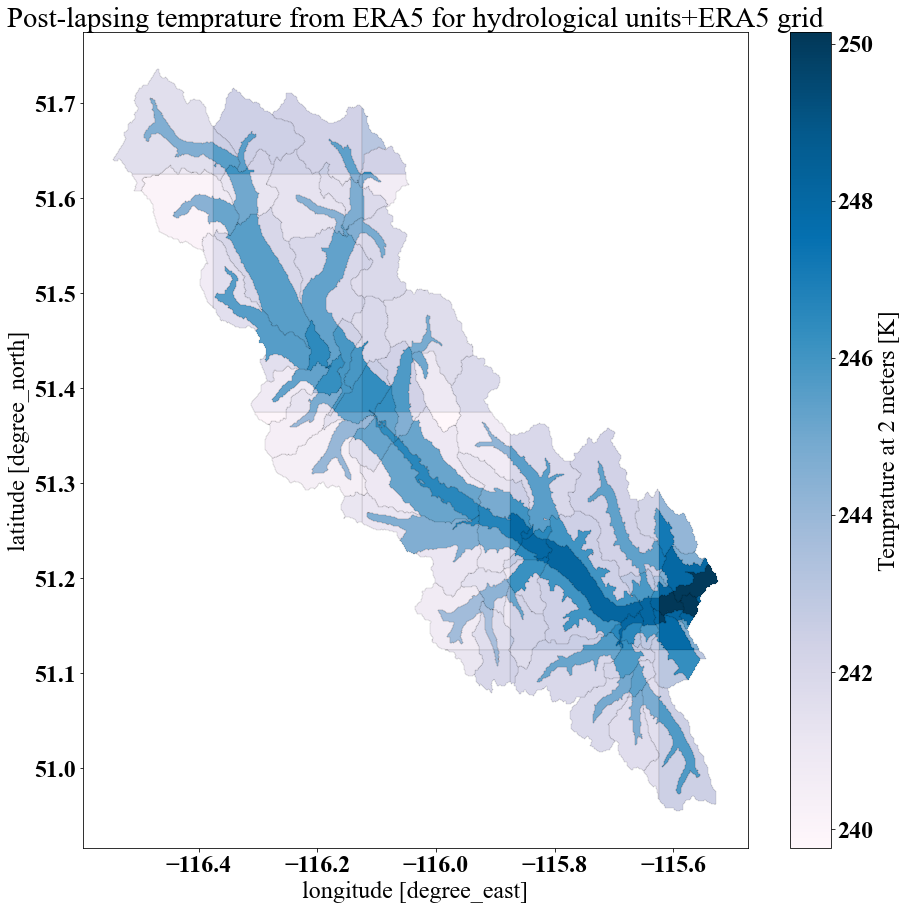

In [6]:
# visualize the result
import geopandas as gpd
import xarray as xr
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)

# visualize the remapped netCDF for the first file, first time step
# target nc file
nc_names = sorted(glob.glob (esmr.output_dir + esmr.case_name + '*.nclapsed'))
ds       = xr.open_dataset(nc_names[0]) # the first netcdf file
values   = ds.airtemp [0,:] # the first time frame of the first 
IDs      = ds.ID [:] # get the ID
# create a data frame for the model simulation
df = pd.DataFrame()
df ['value'] = values
df ['ID_t']    = IDs  # .astype(int)
df = df.sort_values (by = 'ID_t')
# load the shape file target that is generated by EASYMORE (with consistent IDs)
shp_target = gpd.read_file(esmr.temp_dir+ esmr.case_name + '_target_shapefile.shp') # load the target shapefile
shp_target ['ID_t'] = shp_target ['ID_t'].astype(float)
shp_target = shp_target.sort_values(by='ID_t')# sort on values
shp_target = pd.merge_asof(shp_target, df, on='ID_t', direction='nearest')
shp_target = shp_target.set_geometry('geometry') #bring back the geometry filed; pd to gpd
# plotting
f, axes = plt.subplots(1,1,figsize=(15,15))
shp_target.plot(column= 'value',cmap='PuBu', edgecolor='k',linewidth = .1,ax = axes )#, legend=True)
plt.xlabel('longitude [degree_east]')
plt.ylabel('latitude [degree_north]')
plt.title('Post-lapsing temprature from ERA5 for hydrological units+ERA5 grid')
#plt.grid()
norm = colors.Normalize(vmin=shp_target.value.min(), vmax=shp_target.value.max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='PuBu')
# add colorbar
ax_cbar = fig.colorbar(cbar, ax=axes)
# add label for the colorbar
ax_cbar.set_label('Temprature at 2 meters [K]')
plt.savefig('../fig/Example6_D.png')


-------------
-------------
# Calling EASYMORE for the second time to aggregate the temprature to hydrological units (eliminating the ERA5 grids)

In [7]:
# loading EASYMORE
from easymore.easymore import easymore

# initializing EASYMORE object
esmr = easymore()

# specifying EASYMORE objects
# name of the case; the temporary, remapping and remapped file names include case name
esmr.case_name                = 'Bow_lapse_temprature_aggregate'              
# temporary path that the EASYMORE generated GIS files and remapped file will be saved
esmr.temp_dir                 = '../temporary/'
# name of target shapefile that the source netcdf files should be remapped to
esmr.target_shp               = '../data/target_shapefiles/Bow_merit_dem.shp'
# name of netCDF file(s); multiple files can be specified with *
esmr.source_nc                = '../output/Bow_lapse_temprature_detailed_remapped_1979*.nclapsed'
# name of shapefile for the source netCDF file(s)
esmr.source_shp               = '../temporary/Bow_lapse_temprature_detailed_target_shapefile.shp'
# name of latitude field for the source shapefile
esmr.source_shp_lat           = 'lat_t'
# name of longitude field for the source shapefile
esmr.source_shp_lon           = 'lon_t'
esmr.source_shp_ID            = 'ID_t'
# name of variables from source netCDF file(s) to be remapped
esmr.var_names                = ['airtemp','pptrate']
# name of variable longitude in source netCDF files
esmr.var_lon                  = 'longitude'
# name of variable latitude in source netCDF files
esmr.var_lat                  = 'latitude'
# name of variable time in source netCDF file; should be always time
esmr.var_time                 = 'time'
# location where the remapped netCDF file will be saved
esmr.output_dir               = '../output/'
# format of the variables to be saved in remapped files,
# if one format provided it will be expanded to other variables
esmr.format_list              = ['f4']
# fill values of the variables to be saved in remapped files,
# if one value provided it will be expanded to other variables
esmr.fill_value_list          = ['-9999.00']
# if required that the remapped values to be saved as csv as well

# execute EASYMORE
esmr.nc_remapper()

EASYMORE version 0.0.2 is initiated.
no author name is provide and the author name is changed to (author name)!
EASYMORE is given multiple varibales to be remapped but only on format and fill valueEASYMORE repeat the format and fill value for all the variables in output files
EASYMORE will remap variable  airtemp  from source file to variable  airtemp  in remapped NeCDF file
EASYMORE will remap variable  pptrate  from source file to variable  pptrate  in remapped NeCDF file
EASYMORE detects that target shapefile is in WGS84 (epsg:4326)
EASYMORE detects that no field for ID is provided in sink/target shapefile
arbitarary values of ID are added in the field ID_t
EASYMORE detects that either of the fields for latitude or longitude is not provided in sink/target shapefile
calculating centroid of shapes in WGS84 projection;
for better appximation use the easymore equal area centroid function to preprocess target shapefile
EASYMORE detects that no field for latitude is provided in sink/targe

/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_vectorized.py:150: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  out[:] = [_pygeos_to_shapely(geom) for geom in data]
/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_vectorized.py:150: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  out[:] = [_pygeos_to_shapely(geom) for geom in data]


EASYMORE will save standard shapefile for EASYMORE claculation as:
../temporary/Bow_lapse_temprature_aggregate_target_shapefile.shp
EASYMORE detects that the varibales from the netCDF files are identicalin dimensions of the varibales and latitude and longitude
EASYMORE detects that all the varibales have dimensions of:
['time', 'ID']
EASYMORE detects that the longitude varibales has dimensions of:
['ID']
EASYMORE detects that the latitude varibales has dimensions of:
['ID']
EASYMORE detects case 3 - irregular lat/lon; shapefile should be provided
EASYMORE detects that no varibale for ID of the source netCDF file; an arbitatiry ID will be provided
EASYMORE detects that source shapefile is in WGS84 (epsg:4326)
EASYMORE is creating the shapefile from the netCDF file and saving it here:
../temporary/Bow_lapse_temprature_aggregate_source_shapefile.shp
EASYMORE detects that shapefile longitude is between -180 and 180, no correction is performed
EASYMORE detects that shapefile longitude is be

/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_vectorized.py:150: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  out[:] = [_pygeos_to_shapely(geom) for geom in data]
/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_vectorized.py:150: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  out[:] = [_pygeos_to_shapely(geom) for geom in data]
/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site

------REMAPPING------
netcdf output file will be compressed at level 4
Remapping ../output/Bow_lapse_temprature_detailed_remapped_1979-01-01-00-00-00.nclapsed to ../output/Bow_lapse_temprature_aggregate_remapped_1979-01-01-00-00-00.nc
Started at date and time 2021-08-29 11:09:18.159964
Ended   at date and time 2021-08-29 11:09:18.568155
------
Remapping ../output/Bow_lapse_temprature_detailed_remapped_1979-01-02-00-00-00.nclapsed to ../output/Bow_lapse_temprature_aggregate_remapped_1979-01-02-00-00-00.nc
Started at date and time 2021-08-29 11:09:18.579296
Ended   at date and time 2021-08-29 11:09:18.928378
------
Remapping ../output/Bow_lapse_temprature_detailed_remapped_1979-01-03-00-00-00.nclapsed to ../output/Bow_lapse_temprature_aggregate_remapped_1979-01-03-00-00-00.nc
Started at date and time 2021-08-29 11:09:18.942924
Ended   at date and time 2021-08-29 11:09:19.365225
------


--------------
--------------
# Visualizing the lapsed temperature for the hydrological units

['../output/Bow_lapse_temprature_aggregate_remapped_1979-01-01-00-00-00.nc', '../output/Bow_lapse_temprature_aggregate_remapped_1979-01-02-00-00-00.nc', '../output/Bow_lapse_temprature_aggregate_remapped_1979-01-03-00-00-00.nc']


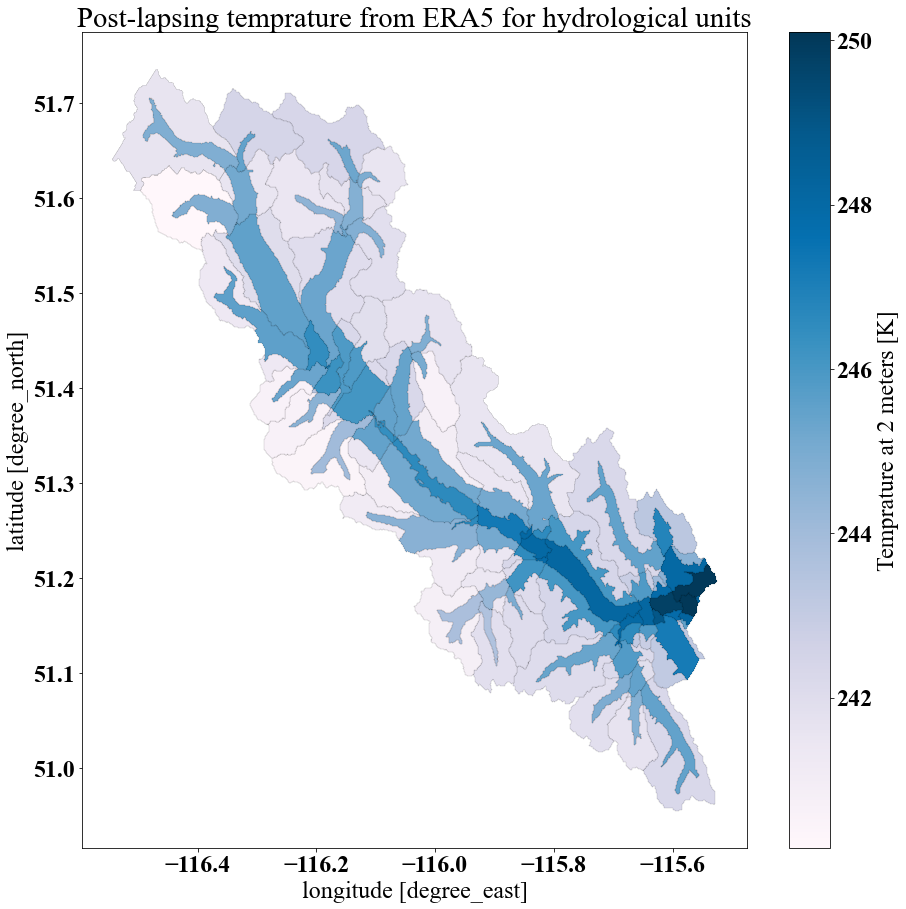

In [8]:
# visualize the result
import geopandas as gpd
import xarray as xr
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)

# visualize the remapped netCDF for the first file, first time step
# target nc file
nc_names = sorted(glob.glob (esmr.output_dir + esmr.case_name + '*.nc'))
print(nc_names)
ds       = xr.open_dataset(nc_names[0]) # the first netcdf file
values   = ds.airtemp [0,:] # the first time frame of the first 
IDs      = ds.ID [:] # get the ID
# create a data frame for the model simulation
df = pd.DataFrame()
df ['value'] = values
df ['ID_t']    = IDs  # .astype(int)
df = df.sort_values (by = 'ID_t')
# load the shape file target that is generated by EASYMORE (with consistent IDs)
shp_target = gpd.read_file(esmr.temp_dir+ esmr.case_name + '_target_shapefile.shp') # load the target shapefile
shp_target ['ID_t'] = shp_target ['ID_t'].astype(float)
shp_target = shp_target.sort_values(by='ID_t')# sort on values
shp_target = pd.merge_asof(shp_target, df, on='ID_t', direction='nearest')
shp_target = shp_target.set_geometry('geometry') #bring back the geometry filed; pd to gpd
# plotting
fig, axes = plt.subplots(1,1,figsize=(15,15))
shp_target.plot(column= 'value',cmap='PuBu', edgecolor='k',linewidth = .1,ax = axes )#, legend=True)
plt.xlabel('longitude [degree_east]')
plt.ylabel('latitude [degree_north]')
plt.title('Post-lapsing temprature from ERA5 for hydrological units')
#plt.grid()
norm = colors.Normalize(vmin=shp_target.value.min(), vmax=shp_target.value.max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='PuBu')
# add colorbar
ax_cbar = fig.colorbar(cbar, ax=axes)
# add label for the colorbar
ax_cbar.set_label('Temprature at 2 meters [K]')
plt.savefig('../fig/Example6_E.png')
